#Course 02
Convolutional Neural Networks in TensorFlow

##Week 01

Convolutional Neural Networks in TensorFlow

### Install the latest tensorflow

In [0]:
# !pip install tensorflow==2.0.0-alpha0 

#or 

!pip install tensorflow --upgrade --force-reinstall

ERROR! Session/line number was not unique in database. History logging moved to new session 59
     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 20.2MB 158kB/s 
     |████████████████████████████████| 26.1MB 117kB/s 
     |████████████████████████████████| 112kB 55.7MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 3.9MB 46.0MB/s 
     |████████████████████████████████| 1.3MB 36.5MB/s 
     |████████████████████████████████| 71kB 11.4MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 2.7MB 37.8MB/s 
     |████████████████████████████████| 51kB 9.5MB/s 
     |████████████████████████████████| 450kB 34.0MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
     |████████████████████████████████| 307kB 72.6MB/s 
     |████████████████████████████████| 583kB 69.4MB/s 
     |████████████████████████████████| 92kB 14.8MB/s 
     |███████████

In [0]:
import tensorflow as tf

In [0]:
print(tf.__version__)

2.2.0-rc1


### Explore the Example Data:

Let's start by downloading our example data, a .zip of 2,000 JPG pictures of cats and dogs, and extracting it locally in `/content`.

**NOTE:** The 2,000 images used in this exercise are excerpted from the ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) available on Kaggle, which contains 25,000 images. Here, we use a subset of the full dataset to decrease training time for educational purposes.

In [0]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /content/cats_and_dogs_filtered.zip

--2020-03-31 10:53:12--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M   265MB/s    in 0.2s    

2020-03-31 10:53:17 (265 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [0]:
import os
import zipfile

zipped_file_path = '/content/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(zipped_file_path ,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [0]:
base_dir = '/content/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

#Directory with our training cat dog pictures 
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

# Directory with our validating cat & dog pictures :
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

Now, let's see what the filenames look like in the `cats` and `dogs` `train` directories (file naming conventions are the same in the `validation` directory):

In [0]:
train_cats_filenames = os.listdir(train_cats_dir)
print('\n',train_cats_filenames[0:5])

train_dogs_filenames = os.listdir(train_dogs_dir)
print('\n',train_dogs_filenames[0:5])


 ['cat.491.jpg', 'cat.24.jpg', 'cat.433.jpg', 'cat.136.jpg', 'cat.21.jpg']

 ['dog.50.jpg', 'dog.742.jpg', 'dog.872.jpg', 'dog.48.jpg', 'dog.342.jpg']


In [0]:
print('\nNumber of train cat image samples : ', len(os.listdir(train_cats_dir)))
print("\nNumber of train dogs images samples : ", len(os.listdir(train_dogs_dir)))

print('\nNumber of validation cat image samples : ',len(os.listdir(validation_cats_dir)))
print('\nNumber of validation dog image samples : ', len(os.listdir(validation_dogs_dir)))


Number of train cat image samples :  1000

Number of train dogs images samples :  1000

Number of validation cat image samples :  500

Number of validation dog image samples :  500


For both cats and dogs, we have 1,000 training images and 500 validation images.

Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:

In [0]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

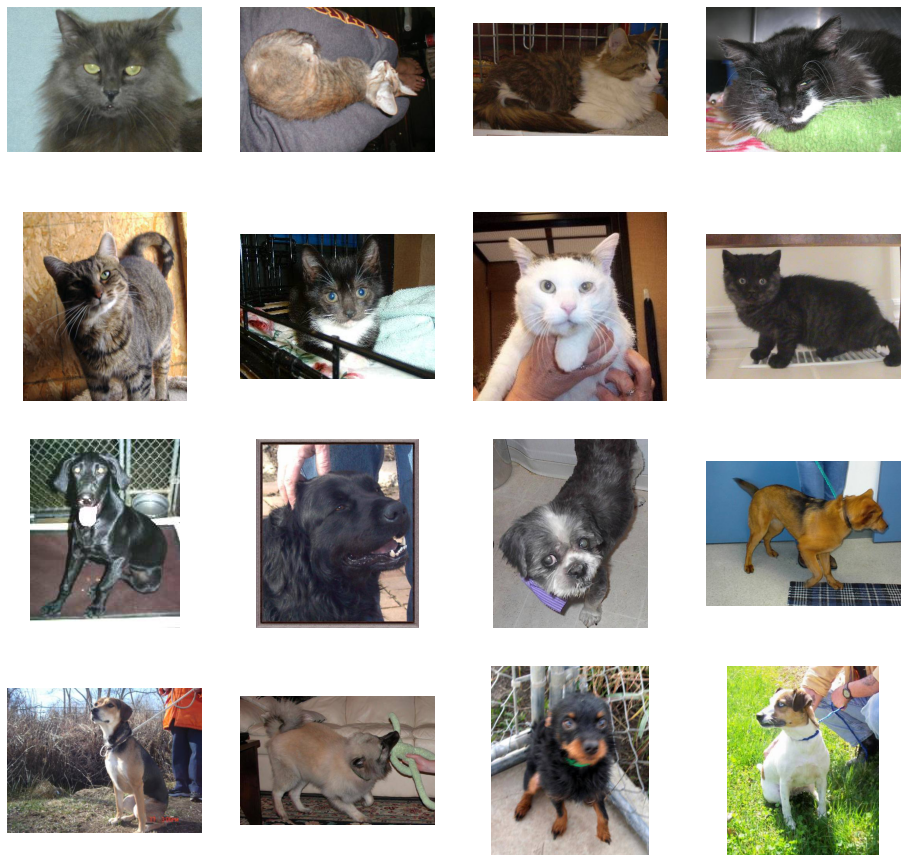

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

list_of_cat_pic_paths = [ os.path.join(train_cats_dir, fname) for fname in train_cats_filenames[ pic_index-8:pic_index] ]
list_of_dog_pic_paths = [ os.path.join(train_dogs_dir, fname) for fname in train_dogs_filenames[ pic_index-8:pic_index]]

complete_image_path_list = list_of_cat_pic_paths + list_of_dog_pic_paths

for i, img_path in enumerate( complete_image_path_list ):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


**OBSERVATION:**

It may not be obvious from looking at the images in this grid, but an important note here, and a significant difference from the previous lesson is that these images come in all shapes and sizes. When you did the handwriting recognition example, you had 28x28 greyscale images to work with. These are color and in a variety of shapes. Before training a Neural network with them you'll need to tweak the images. You'll see that in the next section.

Ok, now that you have an idea for what your data looks like, the next step is to define the model that will be trained to recognize cats or dogs from these images 

### Building a Small Model from Scratch to Get to ~72% Accuracy

In the previous section you saw that the images were in a variety of shapes and sizes. In order to train a neural network to handle them you'll need them to be in a uniform size. We've chosen 150x150 for this, and you'll see the code that preprocesses the images to that shape shortly. 

But before we continue, let's start defining the model:

#### Import libraries:

In [0]:
import tensorflow as tf
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#### Build the Convolutional Model :

Next we will define a Sequential layer as before, adding some convolutional layers first. Note the input shape parameter this time. In the earlier example it was 28x28x1, because the image was 28x28 in greyscale (8 bits, 1 byte for color depth). This time it is 150x150 for the size and 3 (24 bits, 3 bytes) for the color depth. 


We then add a couple of convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers. 

Note that because we are facing a two-class classification problem, i.e. a *binary classification problem*, we will end our network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function), so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [0]:
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(filters = 16 , kernel_size = (3,3), activation = 'relu', input_shape =(150,150,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),

                                   tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),

                                   tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),

                                   tf.keras.layers.Flatten(),

                                   tf.keras.layers.Dense(units = 512, activation = 'relu'),

                                   tf.keras.layers.Dense(units = 1 , activation = 'sigmoid')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

#### Compile the Model

In [0]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.001) , 
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

#### Data Preprocessing using ImageDataGenerator

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit`, `evaluate_generator`, and `predict_generator`.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
                                                    directory = '/content/cats_and_dogs_filtered/train',
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary'
)

test_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory(
                                                     directory ='/content/cats_and_dogs_filtered/validation',
                                                     target_size =(150,150),
                                                     batch_size = 20,
                                                     class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### Training


Let's train on all 2,000 images available, for 15 epochs, and validate on all 1,000 test images. (This may take a few minutes to run.)

Do note the values per epoch.

You'll see 4 values per epoch -- Loss, Accuracy, Validation Loss and Validation Accuracy. 

The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses. The Validation accuracy is the measurement with the data that has not been used in training. As expected this would be a bit lower. You'll learn about why this occurs in the section on overfitting later in this course.

In [0]:
history = model.fit_generator(
                               generator = train_generator,
                               steps_per_epoch = 100,
                               epochs = 10,
                               verbose = 1,
                               validation_data = validation_generator,
                               validation_steps = 50
                              )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
100/100 [==============================] - 9s 93ms/step - loss: 0.8962 - accuracy: 0.5595 - val_loss: 0.6666 - val_accuracy: 0.6320
Epoch 2/10
100/100 [==============================] - 9s 92ms/step - loss: 0.6778 - accuracy: 0.6355 - val_loss: 0.6059 - val_accuracy: 0.6870
Epoch 3/10
100/100 [==============================] - 9s 91ms/step - loss: 0.5757 - accuracy: 0.7060 - val_loss: 0.6329 - val_accuracy: 0.6760
Epoch 4/10
100/100 [==============================] - 9s 91ms/step - loss: 0.4927 - accuracy: 0.7640 - val_loss: 0.6220 - val_accuracy: 0.6960
Epoch 5/10
100/100 [==============================] - 9s 92ms/step - loss: 0.3921 - accuracy: 0.8140 - val_loss: 0.7650 - val_accuracy: 0.6850
Epoch 6/10
100/100 [==============================] - 9s 93ms/step - loss: 0.3086 - accuracy: 0.8735 - val_loss: 0.7525 - val_accuracy: 0.6780
Epoch 7/10
100/100 [==============================] - 9s 92ms/step

####Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a dog or a cat.

In [0]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():
 
# predicting images
fn = 'dog-4.jpg'
path = '/content/cats_and_dogs_filtered/' + fn
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0]>0:
  print(fn + " is a dog")
  
else:
  print(fn + " is a cat")
 

[1.]
dog-4.jpg is a dog


#### Visualization Model for Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

In [0]:
model.layers[:4]

In [0]:
layer_2 = model.layers[1]
layer_2.output

<tf.Tensor 'max_pooling2d/Identity:0' shape=(None, 74, 74, 16) dtype=float32>

1. Create the Visualization Model :

In [0]:
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.

successive_outputs = [ layer.output for layer in model.layers[1:] ]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


2. Choosing a Random Image out of all the images :

In [0]:
import random

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_filenames]
print(len(cat_img_files))

dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_filenames]
print(len(dog_img_files))

# Lets choose randomly one image out of these 2000 images :
img_path = random.choice(cat_img_files + dog_img_files)
print(len(img_path))
print(type(img_path))
print(img_path)

1000
1000
54
<class 'str'>
/content/cats_and_dogs_filtered/train/dogs/dog.313.jpg


3. Convert the Random Image into a shape that our Model Processes :

In [0]:
import numpy as np
from  tensorflow.keras.preprocessing.image import img_to_array, load_img


# Lets load the image chosed randomly
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
print(type(img))


x   = img_to_array(img)              # Numpy array with shape (150, 150, 3)
print(x.shape)

# Lets convert it into a shape which is accepted by our model :

x   = x.reshape((1,) + x.shape)      # Numpy array with shape (1, 150, 150, 3)
print(x.shape)

# Rescale by 1/255
x /= 255.0

<class 'PIL.Image.Image'>
(150, 150, 3)
(1, 150, 150, 3)


4. Feed the data to out visualization Model :

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


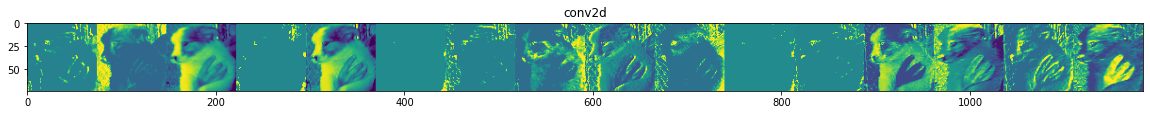

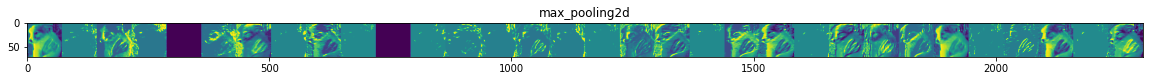

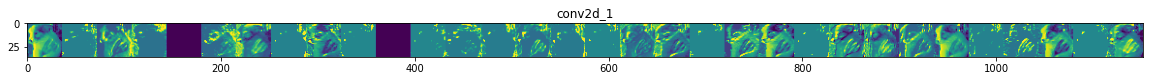

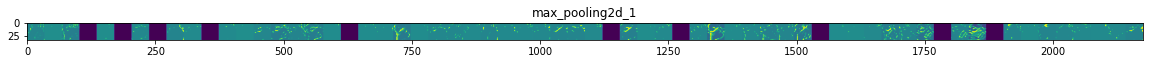

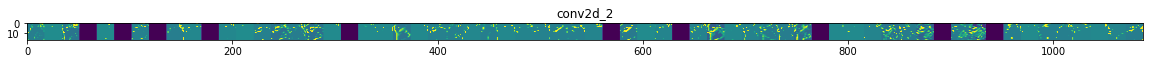

In [0]:
# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.

successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.


These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

#### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

Text(0.5, 1.0, 'Training and validation loss')

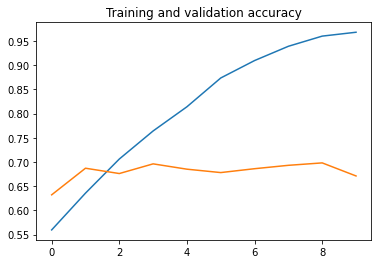

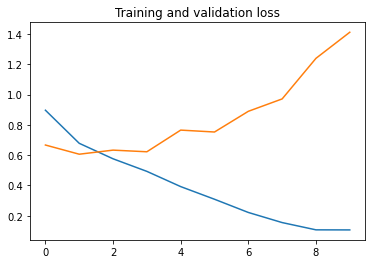

In [0]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

As you can see, we are **overfitting** like it's getting out of fashion. Our training accuracy (in blue) gets close to 100% (!) while our validation accuracy (in green) stalls as 70%. Our validation loss reaches its minimum after only five epochs.

Since we have a relatively small number of training examples (2000), overfitting should be our number one concern. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions. For instance, if you, as a human, only see three images of people who are lumberjacks, and three images of people who are sailors, and among them the only person wearing a cap is a lumberjack, you might start thinking that wearing a cap is a sign of being a lumberjack as opposed to a sailor. You would then make a pretty lousy lumberjack/sailor classifier.

Overfitting is the central problem in machine learning: given that we are fitting the parameters of our model to a given dataset, how can we make sure that the representations learned by the model will be applicable to data never seen before? How do we avoid learning things that are specific to the training data?

In the next exercise, we'll look at ways to prevent overfitting in the cat vs. dog classification model.

#### Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [0]:
# import os, signal

# os.kill(     os.getpid() , 
#          signal.SIGKILL
#        )

### Assignment - Week 01 Cats vs. Dogs Full Dataset 

This week you explored a reduced version of the Cats v Dogs dataset and used it to train a convolutional neural network. You saw that it overfit very quickly, despite great results with the training set. One solution to overfitting is to use more data for both training and validation, and that’s this week’s exercise -- to build a classifier using the full Cats v Dogs dataset of 25k images!

Note again that when loading the images, you might get warnings about EXIF data being missing or corrupt. Don't worry about this -- it is missing data in the images, but it's not visual data that will impact the training.

Let's start building a classifier using the full Cats v Dogs dataset of 25k images.

NOTE: Please do not alter any of the provided code in the exercise. Only add your own code where indicated. Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position. Please use the provided epoch values when training. Once you have completed your notebook assignment and received a final score, please save your notebook, run the final cell, and close your Jupyter Workspace. This will help optimize your Jupyter workspace performance for future assessments. Please note that this step will shut down your kernel, so it is important to save your work in advance of completing this step

In [0]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [0]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL


###------------Kaggle Cat vs Dog Dataset ------------------------

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
# path_cats_and_dogs = f"{getcwd()}/../tmp2/cats-and-dogs.zip"
# shutil.rmtree('/tmp')

import os
import zipfile

zipped_folder_path  = '/tmp/dogs-vs-cats.zip'
zip_ref = zipfile.ZipFile(zipped_folder_path , 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:-- if we upload the kaggle dataset
# 12501
# 12501

# Expected Output: if we upload the coursera dataset
# 1500
# 1500

In [0]:
#to get the current working directory 
os.getcwd()

'/content'

In [0]:
#to get a list of directories 
os.listdir()

['.config',
 'dogs-vs-cats.zip',
 '.ipynb_checkpoints',
 'cats.zip',
 'cats-v-dogs',
 'sample_data']

In [0]:
#to go to the parent directory 
os.chdir(os.pardir)

In [0]:
os.chdir('/content')

In [0]:
# import random  
from random import sample 
  
# Prints list of random items of given length 
list1 = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']  
  
print(sample(list1,3)) 

['3.jpg', '5.jpg', '4.jpg']


In [0]:
int(12.3)

12

In [0]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'

try:
    #YOUR CODE GOES HERE
    os.chdir('/tmp')
    os.mkdir('cats-v-dogs')
    
    os.chdir('cats-v-dogs')
    os.mkdir('training')
    os.mkdir('testing')
    
    os.chdir('training')
    os.mkdir('cats')
    os.mkdir('dogs')
    
    os.chdir(os.pardir)
    os.chdir('testing')
    os.mkdir('cats')
    os.mkdir('dogs')
    
    os.chdir(os.pardir)
    os.chdir(os.pardir)
    
except OSError:
    pass

In [0]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    
    # find all the file names in the source
    list_of_files = os.listdir(SOURCE)
    
    
    #find the no of files to be copied 
    no_of_files_to_be_copied_in_training = SPLIT_SIZE*len(list_of_files)
    no_of_files_to_be_copied_in_training = int(no_of_files_to_be_copied_in_training)

    #randomely select those many files:
    files_to_be_copied = random.sample(list_of_files,no_of_files_to_be_copied_in_training)
    remaining_files = [fn for fn in list_of_files if fn not in files_to_be_copied]
    
    for file_name in files_to_be_copied:
        if os.path.getsize(SOURCE+file_name) != 0:
            copyfile(SOURCE+file_name,TRAINING+file_name)
            
    for file_name in remaining_files:
        if os.path.getsize(SOURCE+file_name) != 0:
            copyfile(SOURCE+file_name,TESTING+file_name)
    
    
# YOUR CODE STARTS HERE
# YOUR CODE ENDS HERE


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"

DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9

split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [0]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))


# Expected output: ----------------Kaggle Data Set ----------------
# 11250
# 11250
# 1250
# 1250

# Expected output: ---------Coursera Data Set ---------------
# 1350
# 1350
# 150
# 150

In [0]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters = 16 , kernel_size = (3,3), activation = 'relu', input_shape =(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    #tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
                                    #tf.keras.layers.MaxPooling2D(2,2),
                           
                                    #tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
                                    #tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(units = 512, activation = 'relu'),

                                    tf.keras.layers.Dense(units = 1 , activation = 'sigmoid')
# YOUR CODE HERE
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


##### NOTE:

In the cell below you **MUST** use a batch size of 10 (`batch_size=10`) for the `train_generator` and the `validation_generator`. Using a batch size greater than 10 will exceed memory limits on the Coursera platform.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


TRAINING_DIR = "/tmp/cats-v-dogs/training/" #YOUR CODE HERE
train_datagen = ImageDataGenerator(rescale = 1./255) #YOUR CODE HERE

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(
                                                    directory = TRAINING_DIR,
                                                    target_size = (150,150),
                                                    batch_size = 10,
                                                    class_mode = 'binary'
                                                    ) #YOUR CODE HERE





VALIDATION_DIR = '/tmp/cats-v-dogs/testing/'#YOUR CODE HERE

validation_datagen = ImageDataGenerator(rescale = 1./255)      #YOUR CODE HERE

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.

validation_generator = validation_datagen.flow_from_directory(
                                                               directory = TRAINING_DIR,
                                                               target_size = (150,150),
                                                               batch_size = 10,
                                                               class_mode = 'binary'
                                                               )               #YOUR CODE HERE



# Expected Output:
# Found 2700 images belonging to 2 classes.
# Found 300 images belonging to 2 classes.

In [0]:
history = model.fit_generator(train_generator,
                              epochs=2,
                              verbose=1,
                              validation_data=validation_generator)


In [0]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

**Submission Instructions**

Now click the 'Submit Assignment' button above.

When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [0]:
# %%javascript
# <!-- Save the notebook -->
# IPython.notebook.save_checkpoint();

In [0]:
# %%javascript
# IPython.notebook.session.delete();
# window.onbeforeunload = null
# setTimeout(function() { window.close(); }, 1000);